<a href="https://colab.research.google.com/github/youngeun1207/keras/blob/main/tmd_wheelchair/June_15sec_rand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
train_data = np.load('/content/drive/MyDrive/TMD_data/train_15s_data.npy')
train_label = np.load('/content/drive/MyDrive/TMD_data/train_15s_label.npy')

val_data = np.load('/content/drive/MyDrive/TMD_data/valid_15s_data.npy')
val_label= np.load('/content/drive/MyDrive/TMD_data/valid_15s_label.npy')

In [4]:
data = np.concatenate([train_data, val_data])
label = np.concatenate([train_label, val_label])
del train_data
del val_data
del train_label
del val_label

np.save("/content/drive/MyDrive/full_data_15sec", data)
np.save("/content/drive/MyDrive/full_label_15sec", label)

In [ ]:
data = np.load('/content/drive/MyDrive/full_data_15sec.npy')
label = np.load('/content/drive/MyDrive/full_label_15sec.npy')

In [5]:
# random sampling
from sklearn.model_selection import train_test_split

train_data, val_data, train_label, val_label = train_test_split(data, label, test_size=0.2, shuffle=True, stratify=label, random_state=34)

del data
del label

In [6]:
print(train_data.shape)
print(train_label.shape)
print(val_data.shape)
print(val_label.shape)

(6983, 900, 10)
(6983, 7)
(1746, 900, 10)
(1746, 7)


In [9]:
# CRNN with 3층 GRU
# crnn_gru_3layers
import tensorflow as tf
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_crnn = Sequential()
model_crnn.add(layers.Conv1D(64, 5, activation='relu',input_shape=((train_data.shape[1:]))))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Dropout(0.5))
model_crnn.add(layers.GRU(128, return_sequences = True))
model_crnn.add(layers.GRU(64, dropout=0.3, return_sequences = True))
model_crnn.add(layers.GRU(32, dropout=0.3))
model_crnn.add(layers.Dense(7, activation='softmax'))

model_crnn.summary()

model_crnn.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_crnn.fit(train_data,
                         train_label,
                         epochs=1000,
                         batch_size=2048,
                         validation_data = (val_data, val_label),
                         verbose=0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 896, 64)           3264      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 179, 64)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 175, 128)          41088     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 35, 128)          0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 35, 128)           0         
                                                                 
 gru_3 (GRU)                 (None, 35, 128)          

55/55 [==============================] - 0s 6ms/step - loss: 0.4789 - accuracy: 0.9066


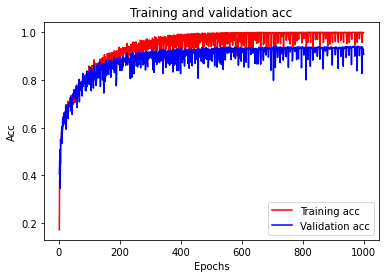

In [10]:
model_crnn.save('/content/drive/MyDrive/TmdJune/15sec_rand/CRNN_GRU_3layers.h5')
model_crnn.evaluate(val_data, val_label)

# CRNN with 3층 GRU
# accuracy: 0.9066
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [11]:
# CRNN cnn층 크게 
# crnn_gru_2layers
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_crnn = Sequential()
model_crnn.add(layers.Conv1D(32, 5, activation='relu', input_shape=((train_data.shape[1:]))))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(64, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Dropout(0.5))
model_crnn.add(layers.GRU(128, dropout=0.5, return_sequences = True))
model_crnn.add(layers.GRU(64, dropout=0.5))
model_crnn.add(layers.Dense(7, activation='softmax'))

model_crnn.summary()

model_crnn.compile(optimizer='rmsprop',
                   loss= 'categorical_crossentropy',
                   metrics= ['accuracy'])

history = model_crnn.fit(train_data,
                         train_label,
                         epochs=1000,
                         batch_size=2048,
                         validation_data = (val_data, val_label),
                         verbose=0)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 896, 32)           1632      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 179, 32)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 175, 64)           10304     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 35, 64)           0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 31, 128)           41088     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 6, 128)          

55/55 [==============================] - 0s 6ms/step - loss: 0.3739 - accuracy: 0.9221


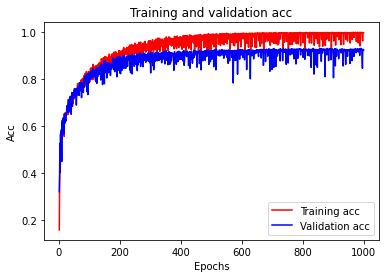

In [12]:
model_crnn.save('/content/drive/MyDrive/TmdJune/15sec_rand/CRNN_GRU_2layers.h5')
model_crnn.evaluate(val_data, val_label)

# crnn_gru_2layers
# accuracy: 0.9221
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [13]:
# CRNN LSTM lr 감소
# crnn_lstm_3layers
import tensorflow as tf
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_crnn = Sequential()
model_crnn.add(layers.Conv1D(64, 5, activation='relu',
                             input_shape=((train_data.shape[1:]))))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Dropout(0.5))
model_crnn.add(layers.LSTM(128, dropout=0.5, return_sequences = True))
model_crnn.add(layers.LSTM(128, dropout=0.5, return_sequences = True))
model_crnn.add(layers.LSTM(64, dropout=0.5))
model_crnn.add(layers.Dense(7, activation='softmax'))

model_crnn.summary()

rmsprop = tf.keras.optimizers.RMSprop(lr=0.0008)

model_crnn.compile(optimizer=rmsprop,
                   loss= 'categorical_crossentropy',
                   metrics= ['accuracy'])

history = model_crnn.fit(train_data,
                    train_label,
                    epochs=1000,
                    batch_size=2048,
                    validation_data = (val_data, val_label),
                    verbose=0)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 896, 64)           3264      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 179, 64)          0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 175, 128)          41088     
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 35, 128)          0         
 1D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 35, 128)           0         
                                                                 
 lstm (LSTM)                 (None, 35, 128)          

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


55/55 [==============================] - 0s 6ms/step - loss: 0.3352 - accuracy: 0.9336


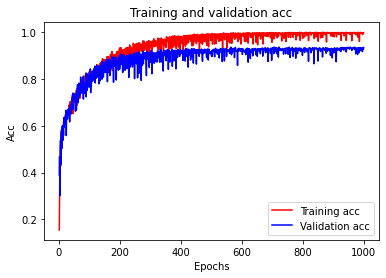

In [14]:
model_crnn.save('/content/drive/MyDrive/TmdJune/15sec_rand/CRNN_LSTM_3layers.h5')
model_crnn.evaluate(val_data, val_label)

# crnn_lstm_3layers
# accuracy: 0.9336
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [15]:
# 3층 1D CNN
# 1Dcnn_3layers
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_cnn = Sequential()
model_cnn.add(layers.Conv1D(32, 5, activation='relu', input_shape=((train_data.shape[1:]))))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(layers.Conv1D(64, 5, activation='relu'))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(layers.Conv1D(128, 5, activation='relu'))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(7, activation='softmax'))

model_cnn.summary()

model_cnn.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_cnn.fit(train_data,
                        train_label,
                        epochs=1000,
                        batch_size=2048,
                        verbose=0,
                        validation_data = (val_data, val_label))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 896, 32)           1632      
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 298, 32)          0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 298, 32)           0         
                                                                 
 conv1d_10 (Conv1D)          (None, 294, 64)           10304     
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 98, 64)           0         
 g1D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 98, 64)           

55/55 [==============================] - 0s 4ms/step - loss: 1.6515 - accuracy: 0.8706


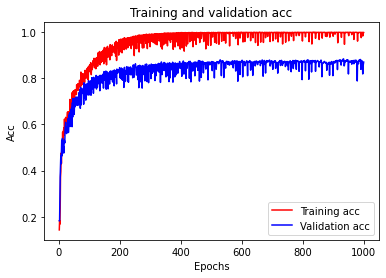

In [16]:
model_cnn.save('/content/drive/MyDrive/TmdJune/15sec_rand/Conv1D.h5')
model_cnn.evaluate(val_data, val_label)

# 1Dcnn_3layers
# accuracy: 0.8706
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [17]:
# 1D CNN 4층
# 1Dcnn_4layers
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_cnn = Sequential()
model_cnn.add(layers.Conv1D(32, 5, activation='relu', input_shape=((train_data.shape[1:]))))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(layers.Conv1D(64, 5, activation='relu'))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(layers.Conv1D(64, 5, activation='relu'))
model_cnn.add(layers.MaxPooling1D(3))
model_cnn.add(layers.Dropout(0.3))
model_cnn.add(layers.Conv1D(128, 5, activation='relu'))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(7, activation='softmax'))

model_cnn.summary()

model_cnn.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_cnn.fit(train_data,
                        train_label,
                        epochs=1000,
                        batch_size=2048,
                        verbose=0,
                        validation_data = (val_data, val_label))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 896, 32)           1632      
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 298, 32)          0         
 g1D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 298, 32)           0         
                                                                 
 conv1d_13 (Conv1D)          (None, 294, 64)           10304     
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 98, 64)           0         
 g1D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 98, 64)           

55/55 [==============================] - 0s 4ms/step - loss: 0.6062 - accuracy: 0.9164


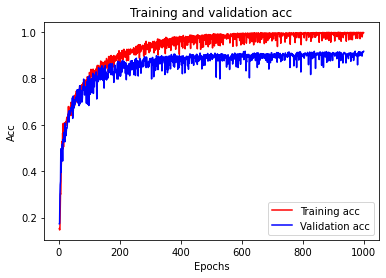

In [18]:
model_cnn.save('/content/drive/MyDrive/TmdJune/15sec_rand/Conv1D_5layers.h5')
model_cnn.evaluate(val_data, val_label)

# 1Dcnn_4layers
# accuracy: 0.9164
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [19]:
# CRNN with 5층 GRU
# crnn_gru_5layers
import tensorflow as tf
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_crnn = Sequential()
model_crnn.add(layers.Conv1D(64, 5, activation='relu',input_shape=((train_data.shape[1:]))))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(64, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Dropout(0.5))

model_crnn.add(layers.GRU(128, return_sequences = True))
model_crnn.add(layers.GRU(128, dropout=0.3, return_sequences = True))

model_crnn.add(layers.GRU(64, dropout=0.3, return_sequences = True))
model_crnn.add(layers.GRU(64, dropout=0.3, return_sequences = True))

model_crnn.add(layers.GRU(32, dropout=0.3))
model_crnn.add(layers.Dense(7, activation='softmax'))

model_crnn.summary()

model_crnn.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_crnn.fit(train_data,
                         train_label,
                         epochs=500,
                         batch_size=2048,
                         validation_data = (val_data, val_label),
                         verbose=0)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 896, 64)           3264      
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 179, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_17 (Conv1D)          (None, 175, 64)           20544     
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 35, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_18 (Conv1D)          (None, 31, 128)           41088     
                                                                 
 conv1d_19 (Conv1D)          (None, 27, 128)          

55/55 [==============================] - 1s 8ms/step - loss: 0.3979 - accuracy: 0.9107


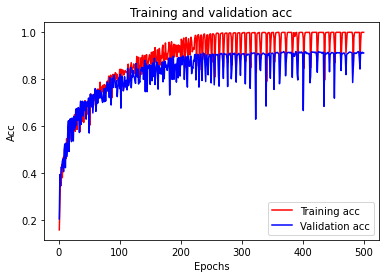

In [20]:
model_crnn.save('/content/drive/MyDrive/TmdJune/15sec_rand/crnn_GRU_5layers.h5')
model_crnn.evaluate(val_data, val_label)

# crnn_gru_5layers
# accuracy: 0.9107
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()